In [1]:
from jupyrest.model import BaseRdfModel
from jupyrest.graph import create_graph, visualize
from rdflib import Namespace
from typing import Set
from datetime import datetime

In [2]:
class Node(BaseRdfModel):
    node_id: str
    
    def uid(self):
        return self.node_id
    
    class Config:
        ns = Namespace("nodes/")
        
class Replica(BaseRdfModel):
    replica_id: str
    node: Node
    
    def uid(self):
        return self.replica_id
    
    class Config:
        ns = Namespace("replicas/")

class Service(BaseRdfModel):
    service_name: str
    replicas: Set[Replica]
    
    def uid(self):
        return self.service_name
    
    class Config:
        ns = Namespace("services/")

class Customer(BaseRdfModel):
    customer_id: str
    services: Set["Service"] = {}

    def uid(self):
        return self.customer_id
    
    class Config:
        ns = Namespace("customers/")
        
class Incident(BaseRdfModel):
    incident_id: str
    incident_time: datetime

    def uid(self):
        return self.incident_id

    class Config:
        ns = Namespace("incidents/")
    
class ReplicaResends(Incident):
    src_replica: Replica
    dest_replica: Replica
    
class SlowDisk(Incident):
    node: Node
    
class SLADip(Incident):
    customer: Customer

In [3]:
node1 = Node(node_id="101")
node2 = Node(node_id="102")
node3 = Node(node_id="103")
node4 = Node(node_id="104")
node5 = Node(node_id="105")

replica1 = Replica(replica_id="001", node=node1)
replica2 = Replica(replica_id="002", node=node2)
replica3 = Replica(replica_id="003", node=node3)
replica4 = Replica(replica_id="004", node=node4)
replica5 = Replica(replica_id="005", node=node2)
replica6 = Replica(replica_id="006", node=node3)
replica7 = Replica(replica_id="007", node=node4)
replica8 = Replica(replica_id="008", node=node5)

serviceA = Service(service_name="service_A", replicas={replica1, replica2, replica3, replica4})
serviceB = Service(service_name="service_B", replicas={replica5, replica6, replica7, replica8})

customer1 = Customer(customer_id="Apple", services={serviceA})
customer2 = Customer(customer_id="Google", services={serviceB})

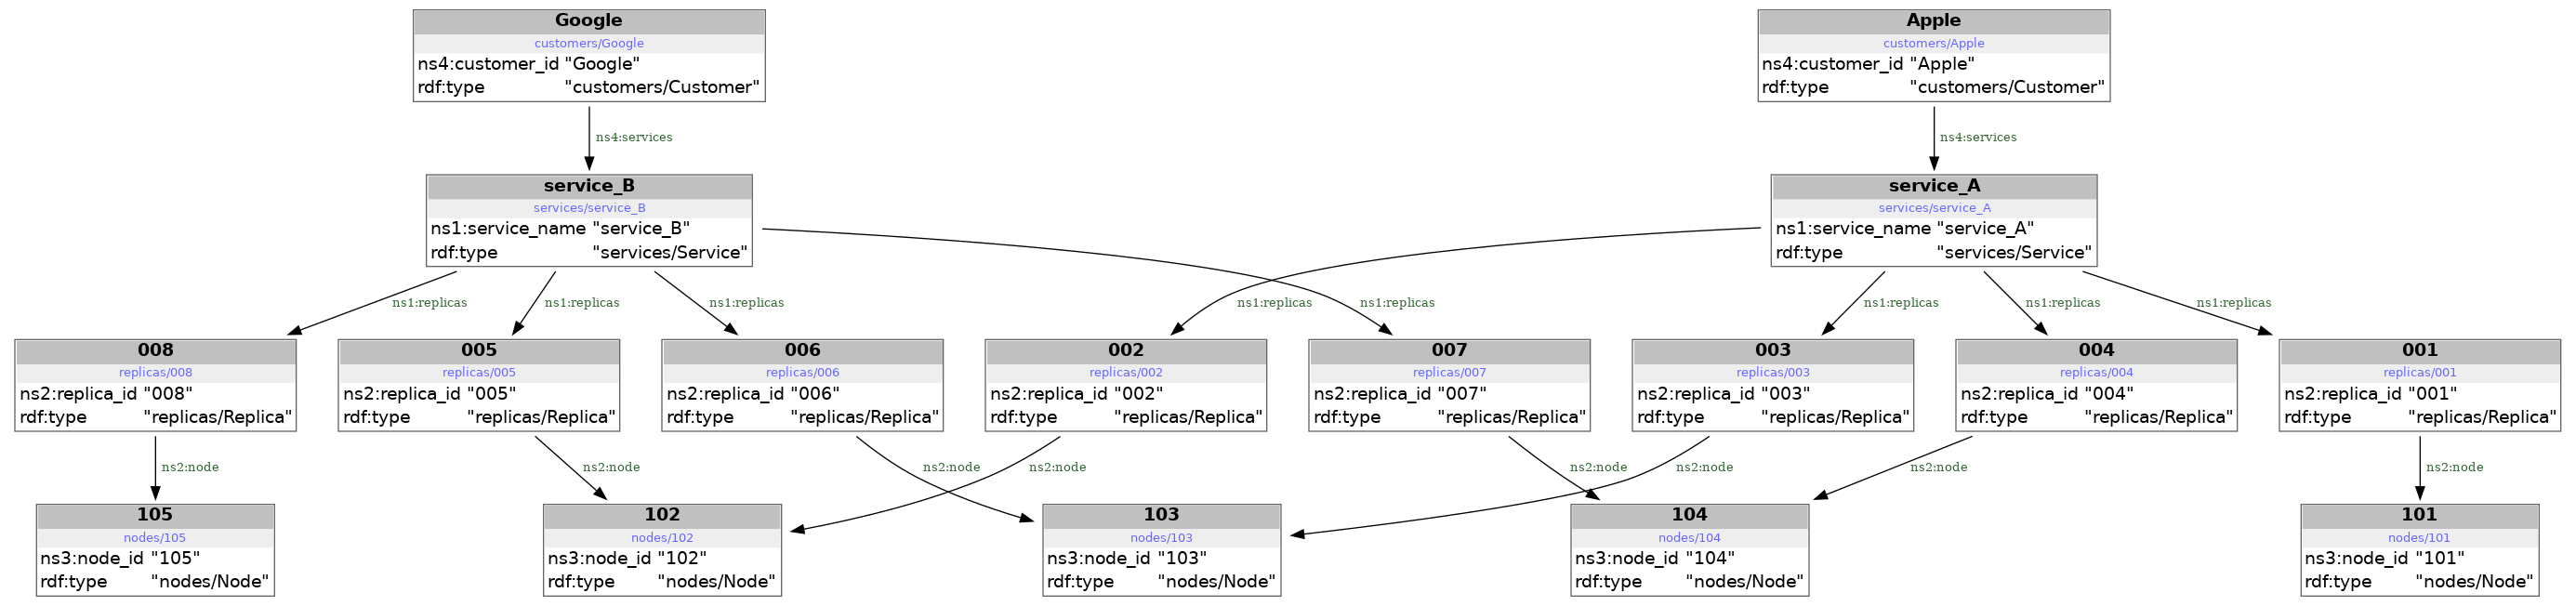

In [4]:
g = create_graph(customer1, customer2)
visualize(g)